<p style="border: 1px solid #e7692c; border-left: 15px solid #e7692c; padding: 10px; text-align:justify;">
    <strong style="color: #e7692c">Tip.</strong> <a style="color: #000000;" href="https://nbviewer.jupyter.org/github/PacktPublishing/Hands-On-Computer-Vision-with-Tensorflow/blob/master/ch4/ch4_nb1_implement_resnet_from_scratch.ipynb" title="View with Jupyter Online">Click here to view this notebook on <code>nbviewer.jupyter.org</code></a>. 
    <br/>These notebooks are better read there, as Github default viewer ignores some of the formatting and interactive content.
    </p>

<table style="font-size: 1em; padding: 0; margin: 0;">
    <tr style="vertical-align: top; padding: 0; margin: 0;background-color: #ffffff">
        <td style="vertical-align: top; padding: 0; margin: 0; padding-right: 15px;">
    <p style="background: #363636; color:#ffffff; text-align:justify; padding: 10px 25px;">
        <strong style="font-size: 1.0em;"><span style="font-size: 1.2em;"><span style="color: #e7692c;">Hands-on</span> Computer Vision with TensorFlow 2</span><br/>by <em>Eliot Andres</em> & <em>Benjamin Planche</em> (Packt Pub.)</strong><br/><br/>
        <strong>> Chapter 4: Influential Classification Tools</strong><br/>
    </p>

<h1 style="width: 100%; text-align: left; padding: 0px 25px;"><small style="color: #e7692c;">Notebook 1:</small><br/>Implementing ResNet from Scratch</h1>
<br/>
<p style="border-left: 15px solid #363636; text-align:justify; padding: 0 10px;">
    In this notebook, we will cover one of the state-of-the-art classifiers presented in Chapter 4: <strong><em>ResNet</em></strong>. Reimplementing this CNN is a great exercise to demonstrate how far we have gone so far, coding in a modular way a performant network from 18 to 152 layer deep!
<br/><br/>
    We will train and test our implementation on <em>CIFAR-100</em>, a well-known computer vision dataset.
</p>
<br/>
<p style="border-left: 15px solid #e7692c; padding: 0 10px; text-align:justify;">
    <strong style="color: #e7692c;">Tip.</strong> The notebooks shared on this git repository illustrate some notions from the book "<em><strong>Hands-on Computer Vision with TensorFlow 2</strong></em>" written by Eliot Andres and Benjamin Planche, published by Packt. If you enjoyed the insights shared here, <a href="https://www.amazon.com/Hands-Computer-Vision-TensorFlow-processing/dp/1788830644" title="Learn more about the book!"><strong>please consider acquiring the book!</strong></a>
<br/><br/>
The book provides further guidance for those eager to learn about computer vision and to harness the power of TensorFlow 2 and Keras to build efficient recognition systems for object detection, segmentation, video processing, smartphone applications, and more.</p>
        </td>
        <td style="vertical-align: top; padding: 0; margin: 0; width: 280px;">
    <a href="https://www.amazon.com/Hands-Computer-Vision-TensorFlow-processing/dp/1788830644" title="Learn more about the book!" target="_blank">
        <img src="../banner_images/book_cover.png" width=280>
    </a>
    <p style="background: #e7692c; color:#ffffff; padding: 10px; text-align:justify;"><strong>Leverage deep learning to create powerful image processing apps with TensorFlow 2 and Keras. <br/></strong>Get the book for more insights!</p>
    <ul style="height: 32px; white-space: nowrap; text-align: center; margin: 0px; padding: 0px; padding-top: 10px;">
    <li style="display: block;height: 100%;float: left;vertical-align: middle;margin: 0 25px 10px;padding: 0px;">
        <a href="https://www.amazon.com/Hands-Computer-Vision-TensorFlow-processing/dp/1788830644" title="Get the book on Amazon (paperback or Kindle version)!" target="_blank">
        <img style="vertical-align: middle; max-width: 72px; max-height: 32px;" src="../banner_images/logo_amazon.png" width="75px">
        </a>
    </li>
    <li style="display: inline-block;height: 100%;vertical-align: middle;float: right;margin: -5px 25px 10px;padding: 0px;">
        <a href="https://www.packtpub.com/application-development/hands-computer-vision-tensorflow-2" title="Get your Packt book (paperback, PDF, ePUB, or MOBI version)!" target="_blank">
        <img style="vertical-align: middle; max-width: 72px; max-height: 32px;" src="../banner_images/logo_packt.png" width="75px">
        </a>
    </li>
    </ul>
        </td>
        </tr>
        </table>

In [2]:
import tensorflow as tf
import os
# Choosing which GPU this notebook can access
# (useful when running multiple experiments in parallel, on different GPUs):
os.environ["CUDA_VISIBLE_DEVICES"]= "2" 

## Preparing the Data

The _CIFAR-10_ and _CIFAR-100_ datasets are famous classification datasets, collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton[$^1$](#ref). The first version contains 60,000 $32 \times 32$ images from 10 different classes, and the second contains 60,000 $32 \times 32$ images from 100 different classes. In this notebook and the next ones for this chapter, we will build and train models to deal with _CIFAR-100_.


***Note:*** Though this classification task is more complex than our previous experiments with _MNIST_, its complexity is not on par with the _ImageNet_ challenge for instance, mentioned in the chapter. We opted for _CIFAR-100_ as this dataset is easy to acquire and light enough for our readers to be able to reproduce our experiments. For the more ambitious ones, we detail in a supplementary notebook how to get started with *ImageNet* and its subset *Tiny-ImageNet*[$^2$](#ref).

### TensorFlow-Datasets

Like other datasets, _CIFAR-100_ is commonly used by researchers to test their algorithms (though the more challenging *ImageNet*[$^2$](#ref) or *Open-Images*[$^3$](#ref) are nowadays preffered to *CIFAR-100*).

To help researchers and amateurs, the TensorFlow team has come up with an optional package: **`tensorflow_datasets`** ([https://www.tensorflow.org/datasets](https://www.tensorflow.org/datasets)). This package provides helper functions to download and some common datasets.

***Note:*** As mentioned in their [disclaimer](https://github.com/tensorflow/datasets#disclaimers):

    "This is a utility library that downloads and prepares public datasets. We do not host or distribute these datasets, vouch for their quality or fairness, or claim that you have license to use the dataset. It is your responsibility to determine whether you have permission to use the dataset under the dataset's license."
    
Let us have a look, listing the datasets available:

In [3]:
# !pip install tensorflow-datasets # Uncomment to install the module

In [4]:
import tensorflow_datasets as tfds

tfds.list_builders()

['bair_robot_pushing_small',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cifar10',
 'cifar100',
 'coco2014',
 'diabetic_retinopathy_detection',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'fashion_mnist',
 'image_label_folder',
 'imagenet2012',
 'imdb_reviews',
 'lm1b',
 'lsun',
 'mnist',
 'moving_mnist',
 'nsynth',
 'omniglot',
 'open_images_v4',
 'quickdraw_bitmap',
 'squad',
 'starcraft_video',
 'svhn_cropped',
 'tf_flowers',
 'wmt_translate_ende',
 'wmt_translate_enfr']

A detailed list can also be found on their website: [https://www.tensorflow.org/datasets/datasets](https://www.tensorflow.org/datasets/datasets).

We will select `"cifar100"`, let the module download it, and display its meta-information:

In [5]:
cifar_builder = tfds.builder("cifar100")
cifar_builder.download_and_prepare()

print(cifar_builder.info)

tfds.core.DatasetInfo(
    name='cifar100',
    version=1.3.1,
    description='This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).',
    urls=['https://www.cs.toronto.edu/~kriz/cifar.html'],
    features=FeaturesDict({
        'coarse_label': ClassLabel(shape=(), dtype=tf.int64, num_classes=20),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=100)
    },
    total_num_examples=60000,
    splits={
        'test': <tfds.core.SplitInfo num_examples=10000>,
        'train': <tfds.core.SplitInfo num_examples=50000>
    },
    supervised_keys=('image', 'label'),
    citation='"""
        @TECHREPORT{Krizhevsky09learning

TensorFlow-Datasets provides us with some useful information, like the sample numbers, types, and sizes, the dataset description, etc.

We can also access the class names as follows:

In [6]:
print(cifar_builder.info.features["label"].names)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

_(Yes, this dataset has... an interesting choice of classes...)_

As we can see from the meta-information, _CIFAR-100_ images can also be classified among 20 coarser classes:

In [7]:
print(cifar_builder.info.features["coarse_label"].names)

['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']


For our experiments, we will however stick to the more complex 100 classes.

### Input Pipeline Preparation

We have our training and testing data available. We can now explicitly define the input pipeline for the models we will train:

In [8]:
import math

# Some hyper-parameters:
input_shape = [224, 224, 3] # We will resize the input images to this shape
batch_size  = 32            # Images per batch (reduce/increase according to the machine's capability)
num_epochs  = 300           # Max number of training epochs

# Train/val Datasets:
train_cifar_dataset = cifar_builder.as_dataset(split=tfds.Split.TRAIN)
val_cifar_dataset = cifar_builder.as_dataset(split=tfds.Split.TEST)

# Number of classes:
num_classes = cifar_builder.info.features['label'].num_classes

# Number of images:
num_train_imgs = cifar_builder.info.splits['train'].num_examples
num_val_imgs = cifar_builder.info.splits['test'].num_examples

In [9]:
print('Training dataset instance: {}'.format(train_cifar_dataset))

Training dataset instance: <_OptionsDataset shapes: {image: (32, 32, 3), label: (), coarse_label: ()}, types: {image: tf.uint8, label: tf.int64, coarse_label: tf.int64}>


The data is provided by the TensorFlow-Datasets module as a **`tf.data.Dataset`** instance.

Chapter 7 is partially dedicated to the **`tf.data`** API and the creation of efficient input pipelines, so we won't detail too much here. We will only mention that `tf.data.Dataset` instances behave like optimized data iterators. They also possess multiple methods to pre-process the data.

For example, we will tell TensorFlow to iterate over the samples `epochs` times and to shuffle them before returning them:

In [10]:
train_cifar_dataset = train_cifar_dataset.repeat(num_epochs).shuffle(10000)

We also want to pre-process the data itself, resizing the images, ignoring the coarser labels, and optionally applying some random _augmentations_ to the images (random operations to artificially increase the number of different images our model can train on - more details in Chapter 7).

We thus implement a function pre-processing the samples accordingly, and passed it to the `tf.data.Dataset` instance:

In [11]:
def _prepare_data_fn(features, input_shape, augment=False):
    """
    Resize image to expected dimensions, and opt. apply some random transformations.
    :param features:    Data
    :param input_shape: Shape expected by the models (images will be resized accordingly)
    :param augment:     Flag to apply some random augmentations to the images
    :return:            Augmented Images, Labels
    """
    input_shape = tf.convert_to_tensor(input_shape)
    
    # Tensorflow-Dataset returns batches as feature dictionaries, expected by Estimators.
    # To train Keras models, it is more straightforward to return the batch content as tuples:
    image = features['image']
    label = features['label']
    # Convert the images to float type, also scaling their values from [0, 255] to [0., 1.]:
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    if augment:
        # Randomly applied horizontal flip:
        image = tf.image.random_flip_left_right(image)

        # Random B/S changes:
        image = tf.image.random_brightness(image, max_delta=0.1)
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.clip_by_value(image, 0.0, 1.0) # keeping pixel values in check

        # Random resize and random crop back to expected size:
        
        random_scale_factor = tf.random.uniform([1], minval=1., maxval=1.4, dtype=tf.float32)
        scaled_height = tf.cast(tf.cast(input_shape[0], tf.float32) * random_scale_factor, 
                                tf.int32)
        scaled_width = tf.cast(tf.cast(input_shape[1], tf.float32) * random_scale_factor, 
                               tf.int32)
        scaled_shape = tf.squeeze(tf.stack([scaled_height, scaled_width]))
        image = tf.image.resize(image, scaled_shape)
        image = tf.image.random_crop(image, input_shape)
    else:
        image = tf.image.resize(image, input_shape[:2])
        
    return image, label

In [12]:
import functools

prepare_data_fn_for_train = functools.partial(_prepare_data_fn, 
                                              input_shape=input_shape,
                                              augment=True)

train_cifar_dataset = train_cifar_dataset.map(prepare_data_fn_for_train, num_parallel_calls=4)

# We also ask the dataset to batch the samples:
train_cifar_dataset = train_cifar_dataset.batch(batch_size)

train_cifar_dataset = train_cifar_dataset.prefetch(1) # improve time performance c.f. Chapter 7

Similarly, we further prepare the validation dataset (though not shuffling or augmenting it):

In [13]:
prepare_data_fn_for_val = functools.partial(_prepare_data_fn, 
                                              input_shape=input_shape,
                                              augment=False)

val_cifar_dataset = (val_cifar_dataset
                     .repeat()
                     .map(prepare_data_fn_for_val, num_parallel_calls=4)
                     .batch(batch_size)
                     .prefetch(1))

We now have our datasets ready to be iterated over for training.

These objects are indeed compatible with Keras methods such as `model.fit(...)`. However, to work properly together, we need to specify to Keras how many batches per epoch such Dataset objects have (when calling `model.fit(...)`, with the parameter `steps_per_epoch` for the number of training batches, and `validation_steps` for the validation ones):

In [14]:
train_steps_per_epoch = math.ceil(num_train_imgs / batch_size)
val_steps_per_epoch   = math.ceil(num_val_imgs / batch_size)

***Note:*** For the next notebooks, we will wrap this data preparation into functions and save them into [`cifar_utils.py`](./cifar_utils.py), for reuse.

## Implementing ResNet with Keras

Once again, we will opt for the Keras API to speed up the implementation. By the end of this section, we will have a _ResNet builder_ tool, able to instantiate any of the usual residual networks (ResNet-18, ResNet-34, ResNet-50, ResNet-101, ResNet-102, etc.)[$^4$](#ref)!

***Note***: We will use Keras Functional API to implement the model. This API can also be used in a more *object-oriented* manner. In the [Appendix](#appendix) of this notebook, we propose a second implementation of ResNet from scratch, following this paradigm.

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Activation, Dense, Flatten, Conv2D, MaxPooling2D, 
    GlobalAveragePooling2D, AveragePooling2D, BatchNormalization, add)
import tensorflow.keras.regularizers as regulizers

### Implementing the Residual Blocks

In order to implement such a model-builder function, able to generate networks of various sizes, we need to make the ResNet implementation modular. Therefore, we will implement the ResNet main components, the residual blocks, in a modular way, so that we can chain them indefinitely.

In Chapter 4, we saw that the residual blocks are composed of:
 - one _residual_ branch, applying a 3x3 convolution to the input, followed by batch normalization and ReLu activation;
 - one _shortcut_ branch, directly forwarding the input without modification, or only applying a 1x1 convolution to adapt the input volume in case it changed in the other branch;
 - one _merge_ operation, performing an element-wise addition between the results of the two branches.

We will now implement each of this sub-modules. First, let us wrap the `conv-batnchnorm-relu` stack of layers into a single function we could reuse at will:

In [16]:
def _res_conv(filters, kernel_size=3, padding='same', strides=1, use_relu=True, use_bias=False, name='cbr',
              kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
    """
    Return a layer block chaining conv, batchnrom and reLU activation.
    :param filters:                 Number of filters.
    :param kernel_size:             Kernel size.
    :param padding:                 Convolution padding.
    :param strides:                 Convolution strides.
    :param use_relu:                Flag to apply ReLu activation at the end.
    :param use_bias:                Flag to use bias or not in Conv layer.
    :param name:                    Name suffix for the layers.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :return:                        Callable layer block
    """

    def layer_fn(x):
        conv = Conv2D(
            filters=filters, kernel_size=kernel_size, padding=padding, strides=strides, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer, 
            name=name + '_c')(x)
        res = BatchNormalization(axis=-1, name=name + '_bn')(conv)
        if use_relu:
            res = Activation("relu", name=name + '_r')(res)
        return res

    return layer_fn

Thanks to this function, we can add this stack of 3 layers to our network simply with `x = _conv_batchnorm_relu(**params)(x)`. We are therefore almost done covering the implementation of the 1st branch in the residual blocks.

Now we will deal with the _shortcut_ branch. For simplicity, we will wrap its operation along with the following _merge_ operation since. Indeed, thisfunction already needs to receive as parameters both the input tensor and the result of the _residual_ branch to the _shortcut_ one, so that it can compare the tensors' shapes to check if the dimensions were changed. If so, a 1x1  convolution is applied to resize the input tensor accordingly before the _merge_. Otherwise, the input tensor is left untouched. And since the function has both thew _residual_ and the _shortcut_ results, it is a matter of a single line to do the _merge_ right away:

In [17]:
def _merge_with_shortcut(kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4), 
                         name='block'):
    """
    Return a layer block which merge an input tensor and the corresponding 
    residual output tensor from another branch.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :param name:                    Name suffix for the layers.
    :return:                        Callable layer block
    """

    def layer_fn(x, x_residual):
        # We check if `x_residual` was scaled down. If so, we scale `x` accordingly with a 1x1 conv:
        x_shape = tf.keras.backend.int_shape(x)
        x_residual_shape = tf.keras.backend.int_shape(x_residual)
        if x_shape == x_residual_shape:
            shortcut = x
        else:
            strides = (
                int(round(x_shape[1] / x_residual_shape[1])), # vertical stride
                int(round(x_shape[2] / x_residual_shape[2]))  # horizontal stride
            )
            x_residual_channels = x_residual_shape[3]
            shortcut = Conv2D(
                filters=x_residual_channels, kernel_size=(1, 1), padding="valid", strides=strides,
                kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
                name=name + '_shortcut_c')(x)

        merge = add([shortcut, x_residual])
        return merge

    return layer_fn

We now have everything to create complete residual blocks:

In [18]:
def _residual_block_basic(filters, kernel_size=3, strides=1, use_bias=False, name='res_basic',
                          kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
    """
    Return a basic residual layer block.
    :param filters:                 Number of filters.
    :param kernel_size:             Kernel size.
    :param strides:                 Convolution strides
    :param use_bias:                Flag to use bias or not in Conv layer.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :return:                        Callable layer block
    """

    def layer_fn(x):
        x_conv1 = _res_conv(
            filters=filters, kernel_size=kernel_size, padding='same', strides=strides, 
            use_relu=True, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            name=name + '_cbr_1')(x)
        x_residual = _res_conv(
            filters=filters, kernel_size=kernel_size, padding='same', strides=1, 
            use_relu=False, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            name=name + '_cbr_2')(x_conv1)
        merge = _merge_with_shortcut(kernel_initializer, kernel_regularizer,name=name)(x, x_residual)
        merge = Activation('relu')(merge)
        return merge

    return layer_fn

With this implementation, we can easily chain residual blocks, e.g.:
    # x = previous layer
    x = _residual_block_basic(filters=64, strides=2)(x)
    x = _residual_block_basic(filters=64, strides=1)(x)
    # ...
    
Before building our complete model, we will however implement a different type of residual blocks. Indeed, this basic block becomes quite costly in terms of computations the deeper the networks goes. In their paper introducing ResNets, He et al. proposed a second type of blocks to replace the basic ones for deeper architectures. To keep in check the number of computations, those blocks make use of the _bottleneck_ technique we presented with the Inception models. The two $3 \times 3$ convolutions are replaced by a $3 \times 3$ convolution surrounded by $1 \times 1$ ones as follow:

In [19]:
def _residual_block_bottleneck(filters, kernel_size=3, strides=1, use_bias=False, name='res_bottleneck',
                               kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
    """
    Return a residual layer block with bottleneck, recommended for deep ResNets (depth > 34).
    :param filters:                 Number of filters.
    :param kernel_size:             Kernel size.
    :param strides:                 Convolution strides
    :param use_bias:                Flag to use bias or not in Conv layer.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :return:                        Callable layer block
    """

    def layer_fn(x):
        x_bottleneck = _res_conv(
            filters=filters, kernel_size=1, padding='valid', strides=strides, 
            use_relu=True, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            name=name + '_cbr1')(x)
        x_conv = _res_conv(
            filters=filters, kernel_size=kernel_size, padding='same', strides=1, 
            use_relu=True, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            name=name + '_cbr2')(x_bottleneck)
        x_residual = _res_conv(
            filters=filters * 4, kernel_size=1, padding='valid', strides=1, 
            use_relu=False, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            name=name + '_cbr3')(x_conv)
        merge = _merge_with_shortcut(kernel_initializer, kernel_regularizer, name=name)(x, x_residual)
        merge = Activation('relu')(merge)
        return merge

    return layer_fn

### Chaining Blocks into Modular Networks

In Chapter 4, we saw that residual blocks in usual ResNet models are chained according to a specific pattern (c.f. figure presenting the ResNet architecture). Every `b` blocks, we find a residual block with `strides = 2` reducing the spatial dimensionality (followed by `b - 1` blocks with `strides = 1`). It will make the rest of the implementation much easier if we wrap the instantiation of these `b` blocks together:

In [20]:
def _residual_macroblock(block_fn, filters, repetitions=3, kernel_size=3, strides_1st_block=1, use_bias=False,
                         kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4),
                         name='res_macroblock'):
    """
    Return a layer block, composed of a repetition of `N` residual blocks.
    :param block_fn:                Block layer method to be used.
    :param repetitions:             Number of times the block should be repeated inside.
    :param filters:                 Number of filters.
    :param kernel_size:             Kernel size.
    :param strides_1st_block:       Convolution strides for the 1st block.
    :param use_bias:                Flag to use bias or not in Conv layer.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :return:                        Callable layer block
    """

    def layer_fn(x):
        for i in range(repetitions):
            block_name = "{}_{}".format(name, i) 
            strides = strides_1st_block if i == 0 else 1
            x = block_fn(filters=filters, kernel_size=kernel_size, 
                         strides=strides, use_bias=use_bias,
                         kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
                         name=block_name)(x)
        return x

    return layer_fn

As before, the function we just wrote makes it possible to easily chain these macro-blocks together into a network as deep as we wish! It is now just a matter of adding the 3 layers preceeding the residual blocks (a 7x7 convolution and a max-pooling) as well as the final layers leading to the predictions (avg-pooling and FC):

In [21]:
def ResNet(input_shape, num_classes=1000, block_fn=_residual_block_basic, repetitions=(2, 2, 2, 2),
           use_bias=False, kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
    """
    Build a ResNet model for classification.
    :param input_shape:             Input shape (e.g. (224, 224, 3))
    :param num_classes:             Number of classes to predict
    :param block_fn:                Block layer method to be used.
    :param repetitions:             List of repetitions for each macro-blocks the network should contain.
    :param use_bias:                Flag to use bias or not in Conv layer.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :return:                        ResNet model.
    """

    # Input and 1st layers:
    inputs = Input(shape=input_shape)
    conv = _res_conv(
        filters=64, kernel_size=7, strides=2, use_relu=True, use_bias=use_bias,
        kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)(inputs)
    maxpool = MaxPooling2D(pool_size=3, strides=2, padding='same')(conv)

    # Chain of residual blocks:
    filters = 64
    strides = 2
    res_block = maxpool
    for i, repet in enumerate(repetitions):
        # We do not further reduce the input size for the 1st block (max-pool applied just before):
        block_strides = strides if i != 0 else 1
        macroblock_name = "block_{}".format(i) 
        res_block = _residual_macroblock(
            block_fn=block_fn, repetitions=repet, name=macroblock_name,
            filters=filters, strides_1st_block=block_strides, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)(res_block)
        filters = min(filters * 2, 1024) # we limit to 1024 filters max

    # Final layers for prediction:
    res_spatial_dim = tf.keras.backend.int_shape(res_block)[1:3]
    avg_pool = AveragePooling2D(pool_size=res_spatial_dim, strides=1)(res_block)
    flatten = Flatten()(avg_pool)
    predictions = Dense(units=num_classes, kernel_initializer=kernel_initializer, 
                        activation='softmax')(flatten)

    # Model:
    model = Model(inputs=inputs, outputs=predictions)
    return model

We have our ResNet-builder function! Playing with the `repetitions` parameter, we can now spawn networks as deep as we want.

With this, we can easily define the classic ResNet models:

In [22]:
def ResNet18(input_shape, num_classes=1000, use_bias=True,
             kernel_initializer='he_normal', kernel_regularizer=None):
    return ResNet(input_shape, num_classes, block_fn=_residual_block_basic, repetitions=(2, 2, 2, 2),
                  use_bias=use_bias, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)


def ResNet34(input_shape, num_classes=1000, use_bias=True,
             kernel_initializer='he_normal', kernel_regularizer=None):
    return ResNet(input_shape, num_classes, block_fn=_residual_block_basic, repetitions=(3, 4, 6, 3),
                  use_bias=use_bias, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)


def ResNet50(input_shape, num_classes=1000, use_bias=True,
             kernel_initializer='he_normal', kernel_regularizer=None):
    # Note: ResNet50 is similar to ResNet34,
    # with the basic blocks replaced by bottleneck ones (3 conv layers each instead of 2)
    return ResNet(input_shape, num_classes, block_fn=_residual_block_bottleneck, repetitions=(3, 4, 6, 3),
                  use_bias=use_bias, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)


def ResNet101(input_shape, num_classes=1000, use_bias=True,
             kernel_initializer='he_normal', kernel_regularizer=None):
    return ResNet(input_shape, num_classes, block_fn=_residual_block_bottleneck, repetitions=(3, 4, 23, 3),
                  use_bias=use_bias, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)


def ResNet152(input_shape, num_classes=1000, use_bias=True,
             kernel_initializer='he_normal', kernel_regularizer=None):
    return ResNet(input_shape, num_classes, block_fn=_residual_block_bottleneck, repetitions=(3, 8, 36, 3),
                  use_bias=use_bias, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)

### Demonstrating with ResNet-50

For the rest of this notebook, we will opt for ResNet-50. 

Note that for their ImageNet experiments, the ResNet authors used 224x224 images as input. In order to have a similar network, we will consider the same input dimensions (adding a proper scaling operation to our input pipeline, to resize the Tiny-ImageNet samples from 64x64 to 224x224):

In [23]:
resnet50 = ResNet50(input_shape=input_shape, num_classes=num_classes)
resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
cbr_c (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
cbr_bn (BatchNormalizationV2)   (None, 112, 112, 64) 256         cbr_c[0][0]                      
__________________________________________________________________________________________________
cbr_r (Activation)              (None, 112, 112, 64) 0           cbr_bn[0][0]                     
______________________________________________________________________________________________

## Classifying Images with ResNet

We will now apply our ResNet-50 model to the classification of the _CIFAR-100_ pictures.

### Training the Network


As we saw in previous chapters and notebooks, training a model with Keras is straightforward. We first instantiate the optimizer, as well as some callbacks to visualize results or regularly save the trained model.


To imitate the ImageNet experiments, we will add the top-5 accuracy metrics we presented in the chapter.
Conveniently, TensorFlow and Keras already provides multiple predefined losses and metrics:

In [24]:
optimizer = tf.keras.optimizers.Adam() #tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)

accuracy_metric = tf.metrics.SparseCategoricalAccuracy(name='acc')
top5_accuracy_metric = tf.metrics.SparseTopKCategoricalAccuracy(k=5, name='top5_acc')
resnet50.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', 
                 metrics=[accuracy_metric, top5_accuracy_metric])

We have been using various pre-defined callbacks in the previous chapters. This time, we will implement our own, inheriting from the abstract `Callback` class. This class defines an interface composed of several methods which will be called by Keras along the training (before each epoch, before each batch iteration, after each batch iteration, etc.).

For demonstration and to have more concise logs (since this notebook is quite long already), we will implement a callback printing some results only every `log_frequency` epochs, with some fancier styling:

In [25]:
# Setting some variables to format the logs:
log_begin_red, log_begin_blue, log_begin_green = '\033[91m', '\033[94m', '\033[92m'
log_begin_bold, log_begin_underline = '\033[1m', '\033[4m'
log_end_format = '\033[0m'

class SimpleLogCallback(tf.keras.callbacks.Callback):
    """ Keras callback for simple, denser console logs."""

    def __init__(self, metrics_dict, num_epochs='?', log_frequency=1,
                 metric_string_template='\033[1m[[name]]\033[0m = \033[94m{[[value]]:5.3f}\033[0m'):
        """
        Initialize the Callback.
        :param metrics_dict:            Dictionary containing mappings for metrics names/keys
                                        e.g. {"accuracy": "acc", "val. accuracy": "val_acc"}
        :param num_epochs:              Number of training epochs
        :param log_frequency:           Log frequency (in epochs)
        :param metric_string_template:  (opt.) String template to print each metric
        """
        super().__init__()

        self.metrics_dict = collections.OrderedDict(metrics_dict)
        self.num_epochs = num_epochs
        self.log_frequency = log_frequency

        # We build a format string to later print the metrics, (e.g. "Epoch 0/9: loss = 1.00; val-loss = 2.00")
        log_string_template = 'Epoch {0:2}/{1}: '
        separator = '; '

        i = 2
        for metric_name in self.metrics_dict:
            templ = metric_string_template.replace('[[name]]', metric_name).replace('[[value]]', str(i))
            log_string_template += templ + separator
            i += 1

        # We remove the "; " after the last element:
        log_string_template = log_string_template[:-len(separator)]
        self.log_string_template = log_string_template

    def on_train_begin(self, logs=None):
        print("Training: {}start{}".format(log_begin_red, log_end_format))

    def on_train_end(self, logs=None):
        print("Training: {}end{}".format(log_begin_green, log_end_format))

    def on_epoch_end(self, epoch, logs={}):
        if (epoch - 1) % self.log_frequency == 0 or epoch == self.num_epochs:
            values = [logs[self.metrics_dict[metric_name]] for metric_name in self.metrics_dict]
            print(self.log_string_template.format(epoch, self.num_epochs, *values))
        

***Note:*** This callback function is added to [`keras_custom_callbacks.py`](./keras_custom_callbacks.py), so we can reuse it in the next notebooks.

We now instantiate and prepare all the callbacks we want to apply to our training:

In [26]:
import collections

# Callback to simply log metrics at the end of each epoch (saving space compared to verbose=1):
metrics_to_print = collections.OrderedDict([("loss", "loss"), 
                                            ("v-loss", "val_loss"),
                                            ("acc", "acc"), 
                                            ("v-acc", "val_acc"),
                                            ("top5-acc", "top5_acc"), 
                                            ("v-top5-acc", "val_top5_acc")])

callback_simple_log = SimpleLogCallback(metrics_to_print, 
                                        num_epochs=num_epochs, log_frequency=2)

In [27]:
model_dir = './models/resnet_from_scratch'
callbacks = [
    # Callback to interrupt the training if the validation loss/metrics stops improving for some epochs:
    tf.keras.callbacks.EarlyStopping(patience=8, monitor='val_acc',
                                     restore_best_weights=True),
    # Callback to log the graph, losses and metrics into TensorBoard:
    tf.keras.callbacks.TensorBoard(log_dir=model_dir, histogram_freq=0, write_graph=True),
    # Callback to save the model (e.g., every 5 epochs), specifying the epoch and val-loss in the filename:
    tf.keras.callbacks.ModelCheckpoint(
        os.path.join(model_dir, 'weights-epoch{epoch:02d}-loss{val_loss:.2f}.h5'), period=5),
    # Log callback:
    callback_simple_log 
]

We can now compile our model with a classification loss and the desired metrics, before launching the training:

In [28]:
history = resnet50.fit(train_cifar_dataset,  
                       epochs=num_epochs, steps_per_epoch=train_steps_per_epoch,
                       validation_data=(val_cifar_dataset), validation_steps=val_steps_per_epoch,
                       verbose=0, callbacks=callbacks)

Training: start
Epoch  1/300: loss = 3.746; v-loss = 12.998; acc = 0.126; v-acc = 0.048; top5-acc = 0.354; v-top5-acc = 0.154
Epoch  3/300: loss = 3.119; v-loss = 3.005; acc = 0.235; v-acc = 0.271; top5-acc = 0.526; v-top5-acc = 0.562
Epoch  5/300: loss = 2.653; v-loss = 2.460; acc = 0.328; v-acc = 0.372; top5-acc = 0.639; v-top5-acc = 0.671
Epoch  7/300: loss = 2.262; v-loss = 2.165; acc = 0.409; v-acc = 0.431; top5-acc = 0.721; v-top5-acc = 0.739
Epoch  9/300: loss = 1.951; v-loss = 2.124; acc = 0.478; v-acc = 0.451; top5-acc = 0.780; v-top5-acc = 0.750
Epoch 11/300: loss = 1.736; v-loss = 1.926; acc = 0.530; v-acc = 0.496; top5-acc = 0.819; v-top5-acc = 0.780
Epoch 13/300: loss = 1.536; v-loss = 1.746; acc = 0.574; v-acc = 0.536; top5-acc = 0.851; v-top5-acc = 0.819
Epoch 15/300: loss = 1.391; v-loss = 1.731; acc = 0.611; v-acc = 0.549; top5-acc = 0.874; v-top5-acc = 0.821
Epoch 17/300: loss = 1.234; v-loss = 1.776; acc = 0.650; v-acc = 0.540; top5-acc = 0.897; v-top5-acc = 0.821
Ep

We can either follow the training thanks to Keras' console logs, or in Tensorboard thanks to the callback we set up (Tensoboard can be launched with `tensorboard --logdir ./models`, and then accessed at [localhost:6006](localhost:6006)). 

Training a CNN from scratch is a long, expensive operation, as we can observe here (which is one of the reasons to apply transfer learning whenever it is possible, as we will demonstrate in the next notebooks). 

Note that the `history` object returned by `model.fit()` can also be used to plot some of the training metrics:

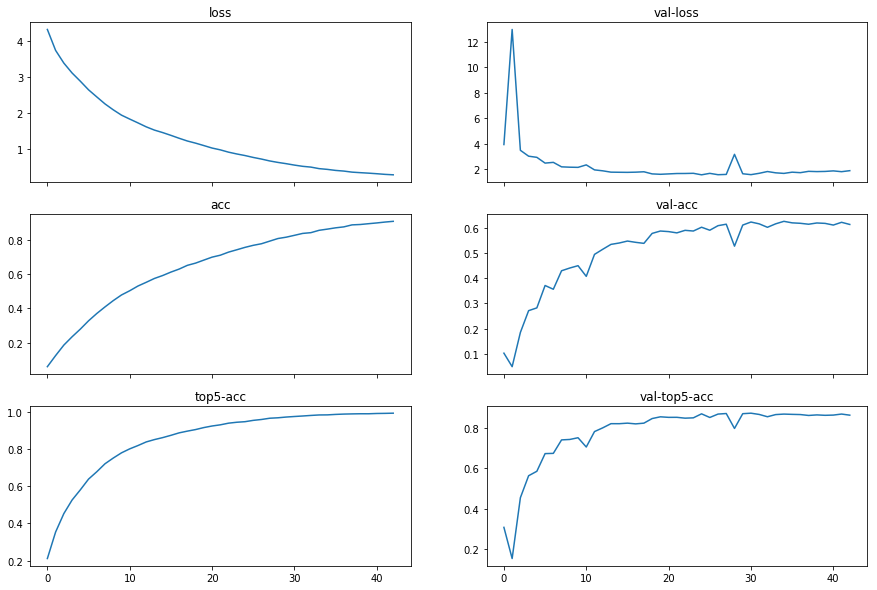

In [33]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(15, 10), sharex='col') # add parameter `sharey='row'` for a more direct comparison
ax[0, 0].set_title("loss")
ax[0, 1].set_title("val-loss")
ax[1, 0].set_title("acc")
ax[1, 1].set_title("val-acc")
ax[2, 0].set_title("top5-acc")
ax[2, 1].set_title("val-top5-acc")

ax[0, 0].plot(history.history['loss'])
ax[0, 1].plot(history.history['val_loss'])
ax[1, 0].plot(history.history['acc'])
ax[1, 1].plot(history.history['val_acc'])
ax[2, 0].plot(history.history['top5_acc'])
ax[2, 1].plot(history.history['val_top5_acc'])


In [35]:
best_val_acc = max(history.history['val_acc']) * 100
best_val_top5 = max(history.history['val_top5_acc']) * 100

print('Best val acc:  {:2.2f}%'.format(best_val_acc))
print('Best val top5: {:2.2f}%'.format(best_val_top5))


Best val acc:  62.79%
Best val top5: 87.06%


Guessing the exact correct class out of 200 almost 40% of the time is not a bad start. We should keep in mind that Tiny-ImageNet is a difficult dataset, with not that many training samples per class. Inspired by the notions covered in the book, we will demonstrate in the next notebooks how to increase the accuracy nonetheless.

### Predicting with the Network

Since we know have a complex model, fully implemented and trained by ourselves, we cannot conclude this notebook without at least testing it once on some unseen images.

For that purpose, we first implement some utility functions to load test images (simply as `numpy` arrays), to get the top-5 predictions and corresponing labels from the model's outputs, and finally to plot the results:

In [36]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def load_image(image_path, size):
    """
    Load an image as a Numpy array.
    :param image_path:  Path of the image
    :param size:        Target size
    :return             Image array, normalized between 0 and 1
    """
    image = img_to_array(load_img(image_path, target_size=size)) / 255.
    return image


def process_predictions(class_probabilities, class_readable_labels, k=5):
    """
    Process a batch of predictions from our estimator.
    :param class_probabilities:     Prediction results returned by the Keras classifier for a batch of data
    :param class_readable_labels:   List of readable-class labels, for display
    :param k:                       Number of top predictions to consider
    :return                         Readable labels and probabilities for the predicted classes
    """
    topk_labels, topk_probabilities = [], []
    for i in range(len(class_probabilities)):
        # Getting the top-k predictions:
        topk_classes = sorted(np.argpartition(class_probabilities[i], -k)[-k:])
    
        # Getting the corresponding labels and probabilities:
        topk_labels.append([class_readable_labels[predicted] for predicted in topk_classes])
        topk_probabilities.append(class_probabilities[i][topk_classes])
    
    return topk_labels, topk_probabilities


def display_predictions(images, topk_labels, topk_probabilities):
    """
    Plot a batch of predictions.
    :param images:                  Batch of input images
    :param topk_labels:             String labels of predicted classes
    :param topk_probabilities:      Probabilities for each class
    """
    num_images = len(images)
    num_images_sqrt = np.sqrt(num_images)
    plot_cols = plot_rows = int(np.ceil(num_images_sqrt))
    
    figure = plt.figure(figsize=(13,10))
    grid_spec = gridspec.GridSpec(plot_cols, plot_rows)
    
    for i in range(num_images):
        img, pred_labels, pred_proba = images[i], topk_labels[i], topk_probabilities[i]
        # Shortening the labels to better fit in the plot:
        pred_labels = [label.split(',')[0][:20] for label in pred_labels]
        
        grid_spec_i = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=grid_spec[i], 
                                                       hspace=0.1)
        
        # Drawing the input image:
        ax_img = figure.add_subplot(grid_spec_i[:2])
        ax_img.axis('off')
        ax_img.imshow(img)
        ax_img.autoscale(tight=True)
        
        # Plotting a bar chart for the predictions:
        ax_pred = figure.add_subplot(grid_spec_i[2])
        ax_pred.spines['top'].set_visible(False)
        ax_pred.spines['right'].set_visible(False)
        ax_pred.spines['bottom'].set_visible(False)
        ax_pred.spines['left'].set_visible(False)
        y_pos = np.arange(len(pred_labels))
        ax_pred.barh(y_pos, pred_proba, align='center')
        ax_pred.set_yticks(y_pos)
        ax_pred.set_yticklabels(pred_labels)
        ax_pred.invert_yaxis()
        
    plt.tight_layout()
    plt.show()

***Note:*** This utility functions are added to [`classification_utils.py`](classification_utils.py) for later use.

We made available several pictures, taken from our holiday photo albums. Let us see how our model fares on these real images!

First we load them:

In [37]:
test_filenames = glob.glob(os.path.join('res', '*'))
test_images = np.asarray([load_image(file, size=input_shape[:2]) for file in test_filenames])
print('Test Images: {}'.format(test_images.shape))

Test Images: (16, 224, 224, 3)


Finally, we can use our model to predict image per image or batch per batch, and we can use the utility functions we just implemented to display the results:

Predicted class probabilities: (16, 100)


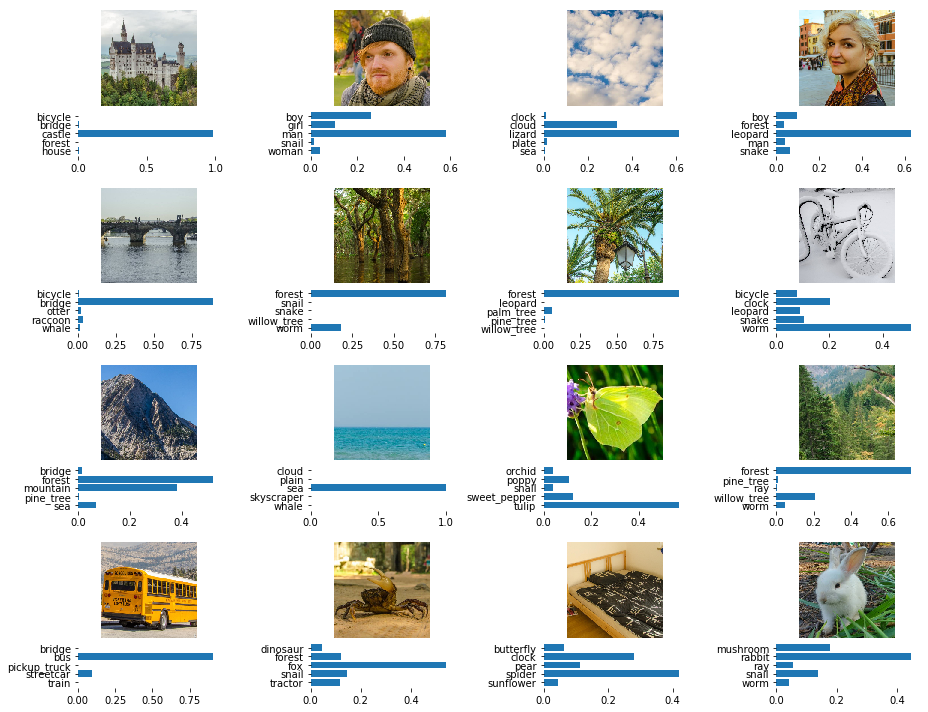

In [38]:
image_batch = test_images[:16]

# Our model was trained on CIFAR images, which originally are 32x32px. We scaled them up
# to 224x224px to train our model on, but this means the resulting images had important
# artifacts/low quality.
# To test on images of the same quality, we first resize them to 32x32px, then to the 
#expected input size (i.e., 224x224px):
cifar_original_image_size = cifar_builder.info.features['image'].shape[:2]
image_batch_low_quality = tf.image.resize(image_batch, cifar_original_image_size)
image_batch_low_quality = tf.image.resize(image_batch_low_quality, input_shape[:2])
    

predictions = resnet50.predict_on_batch(image_batch_low_quality)
print('Predicted class probabilities: {}'.format(predictions.shape))

class_readable_labels = cifar_builder.info.features["label"].names
top5_labels, top5_probabilities = process_predictions(predictions, class_readable_labels)
    
display_predictions(image_batch, top5_labels, top5_probabilities)

## Conclusion

We covered quite some ground with this notebook! Applying the knowledge acquired from the book, we re-implemented a complete state-of-the-art CNN and applied it to a difficult dataset. We monitored its training and learned how to visualize classification predictions.
These skills will be further honed in the remaining notebooks covering Chapter 4.

<a id="ref"></a>
#### References

1. Krizhevsky, Alex, Hinton, Geoffrey. "*Learning multiple layers of features from tiny images*" (2009), Citeseer.
2. Kuznetsova, A., Rom, H., Alldrin, N., Uijlings, J., Krasin, I., Pont-Tuset, J., Kamali, S., Popov, S., Malloci, M., Duerig, T., others, 2018. The open images dataset v4: Unified image classification, object detection, and visual relationship detection at scale. arXiv preprint arXiv:1811.00982.
3. Russakovsky, O., Deng, J., Su, H., Krause, J., Satheesh, S., Ma, S., Huang, Z., Karpathy, A., Khosla, A., Bernstein, M., Berg, A.C., Fei-Fei, L., 2014. ImageNet Large Scale Visual Recognition Challenge. arXiv:1409.0575 [cs].
4. He, K., Zhang, X., Ren, S., Sun, J., 2015. Deep Residual Learning for Image Recognition. arXiv:1512.03385 [cs].

<a id="appendix"></a>
## Appendix - Object-Oriented Model Implementation

In this appendix, we propose a different re-implementation of _ResNet_, following a more _object-oriented_ approach.

We rewrite each of the functions to generate layers and blocks as classes, still using Keras Functional API:

In [ ]:
class ConvWithBatchNorm(tf.keras.layers.Conv2D):
    """ Convolutional layer with batch normalization"""

    def __init__(self, activation='relu', name='convbn', **kwargs):
        """
        Initialize the layer. 
        :param activation:   Activation function (name or callable)
        :param name:         Name suffix for the sub-layers.
        :param kwargs:       Mandatory and optional parameters of tf.keras.layers.Conv2D
        """
        
        self.activation = Activation(
            activation, name=name + '_act') if activation is not None else None
        
        super().__init__(activation=None, name=name + '_c', **kwargs)
        
        self.batch_norm = BatchNormalization(axis=-1, name=name + '_bn')

    def call(self, inputs, training=None):
        """
        Call the layer. 
        :param inputs:         Input tensor to process
        :param training:       Flag to let TF knows if it is a training iteration or not
                               (this will affect the behavior of BatchNorm)
        :return:               Convolved tensor
        """
        x = super().call(inputs)
        x = self.batch_norm(x, training=training)
        if self.activation is not None:
            x = self.activation(x)
        return x

In [ ]:
import functools

class ResidualMerge(tf.keras.layers.Layer):
    """ Layer to merge the original tensor and the residual one in residual blocks"""

    def __init__(self, name='block', **kwargs):
        """
        Initialize the layer. 
        :param activation:   Activation function (name or callable)
        :param name:         Name suffix for the sub-layers.
        :param kwargs:       Optional parameters of tf.keras.layers.Conv2D
        """
        
        super().__init__(name=name)
        self.shortcut = None
        self.kwargs = kwargs
        
    def build(self, input_shape):
        x_shape = input_shape[0]
        x_residual_shape = input_shape[1]
        if x_shape[1] == x_residual_shape[1] and \
           x_shape[2] == x_residual_shape[2] and \
           x_shape[3] == x_residual_shape[3]:
            self.shortcut = functools.partial(tf.identity, name=self.name + '_shortcut')
        else:
            strides = (
                int(round(x_shape[1] / x_residual_shape[1])), # vertical stride
                int(round(x_shape[2] / x_residual_shape[2]))  # horizontal stride
            )
            x_residual_channels = x_residual_shape[3]
            self.shortcut = ConvWithBatchNorm(
                filters=x_residual_channels, kernel_size=(1, 1), strides=strides,
                activation=None, name=self.name + '_shortcut_c', **self.kwargs)
        

    def call(self, inputs):
        """
        Call the layer. 
        :param inputs:         Tuple of two input tensors to merge
        :return:               Merged tensor
        """
        x, x_residual = inputs
        
        x_shortcut = self.shortcut(x)
        x_merge = add([x_shortcut, x_residual])
        return x_merge

In [ ]:
class BasicResidualBlock(tf.keras.Model):
    """ Basic residual block"""

    def __init__(self, filters=16, kernel_size=1, strides=1, activation='relu',
                 kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4),
                 name='res_basic', **kwargs):
        """
        Initialize the layer. 
        :param filters:                 Number of filters
        :param kernel_size:             Kernel size
        :param strides:                 Convolution strides
        :param activation:              Activation function (name or callable)
        :param kernel_initializer:      Kernel initialisation method name
        :param kernel_regularizer:      Kernel regularizer
        :param name:                    Name suffix for the sub-layers.
        :param kwargs:                  Optional parameters of tf.keras.layers.Conv2D
        """
        super().__init__(name=name)
        
        self.conv_1 = ConvWithBatchNorm(
            filters=filters, kernel_size=kernel_size, activation=activation, padding='same',
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            strides=strides, name=name + '_cb_1', **kwargs)
        
        self.conv_2 = ConvWithBatchNorm(
            filters=filters, kernel_size=kernel_size, activation=None, padding='same',
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            strides=1, name=name + '_cb_2', **kwargs)
        
        self.merge = ResidualMerge(
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer, 
            name=name)
        
        self.activation = Activation(activation, name=name + '_act')

    def call(self, inputs, training=None):
        """
        Call the block. 
        :param inputs:         Input tensor to process
        :param training:       Flag to let TF knows if it is a training iteration or not
                               (this will affect the behavior of BatchNorm)
        :return:               Block output tensor
        """
        x = inputs
        # Residual path:
        x_residual = self.conv_1(x, training=training)
        x_residual = self.conv_2(x_residual, training=training)
        
        # Merge residual result with original tensor:
        x_merge = self.merge([x, x_residual])
        x_merge = self.activation(x_merge)
        return x_merge

In [ ]:
class ResidualBlockWithBottleneck(tf.keras.Model):
    """ Residual block with bottleneck, recommended for deep ResNets (depth > 34)"""
    def __init__(self, filters=16, kernel_size=1, strides=1, activation='relu',
                 kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4),
                 name='res_basic', **kwargs):
        """
        Initialize the block. 
        :param filters:                 Number of filters
        :param kernel_size:             Kernel size
        :param strides:                 Convolution strides
        :param activation:              Activation function (name or callable)
        :param kernel_initializer:      Kernel initialisation method name
        :param kernel_regularizer:      Kernel regularizer
        :param name:                    Name suffix for the sub-layers.
        :param kwargs:                  Optional parameters of tf.keras.layers.Conv2D
        """
        super().__init__(name=name)
        
        self.conv_0 = ConvWithBatchNorm(
            filters=filters, kernel_size=1, activation=activation, padding='valid',
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            strides=1, name=name + '_cb_0', **kwargs)
        
        self.conv_1 = ConvWithBatchNorm(
            filters=filters, kernel_size=kernel_size, activation=activation, padding='same',
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            strides=strides, name=name + '_cb_1', **kwargs)
        
        self.conv_2 = ConvWithBatchNorm(
            filters=4 * filters, kernel_size=1, activation=None, padding='valid',
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            strides=1, name=name + '_cb_2', **kwargs)
        
        self.merge = ResidualMerge(
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer, 
            name=name)
        
        self.activation = Activation(activation, name=name + '_act')

    def call(self, inputs, training=None):
        """
        Call the layer. 
        :param inputs:         Input tensor to process
        :param training:       Flag to let TF knows if it is a training iteration or not
                               (this will affect the behavior of BatchNorm)
        :return:               Block output tensor
        """
        x = inputs
        # Residual path:
        x_residual = self.conv_0(x, training=training)
        x_residual = self.conv_1(x_residual, training=training)
        x_residual = self.conv_2(x_residual, training=training)
        
        # Merge residual result with original tensor:
        x_merge = self.merge([x, x_residual])
        x_merge = self.activation(x_merge)
        return x_merge

In [ ]:
class ResidualMacroBlock(tf.keras.models.Sequential):
    """ Macro-block, chaining multiple residual blocks (as a Sequential model)"""

    def __init__(self, block_class=ResidualBlockWithBottleneck, repetitions=3, 
                 filters=16, kernel_size=1, strides=1, activation='relu',
                 kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4),
                 name='res_macroblock', **kwargs):
        """
        Initialize the block. 
        :param block_class:             Block class to be used.
        :param repetitions:             Number of times the block should be repeated inside.
        :param filters:                 Number of filters
        :param kernel_size:             Kernel size
        :param strides:                 Convolution strides
        :param activation:              Activation function (name or callable)
        :param kernel_initializer:      Kernel initialisation method name
        :param kernel_regularizer:      Kernel regularizer
        :param name:                    Name suffix for the sub-layers.
        :param kwargs:                  Optional parameters of tf.keras.layers.Conv2D
        """
        super().__init__(
            [block_class(
                 filters=filters, kernel_size=kernel_size, activation=activation,
                 strides=strides if i == 0 else 1, name="{}_{}".format(name, i),
                 kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)
             for i in range(repetitions)], 
            name=name)

In [ ]:
class ResNet(tf.keras.models.Sequential):
    """ ResNet model for classification"""

    def __init__(self, input_shape, num_classes=1000, 
                 block_class=ResidualBlockWithBottleneck, repetitions=(2, 2, 2, 2),
                 kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4),
                 name='resnet'):
        """
        Initialize a ResNet model for classification.
        :param input_shape:             Input shape (e.g. (224, 224, 3))
        :param num_classes:             Number of classes to predict
        :param block_class:             Block class to be used
        :param repetitions:             List of repetitions for each macro-blocks the network should contain
        :param kernel_initializer:      Kernel initialisation method name
        :param kernel_regularizer:      Kernel regularizer
        :param name:                    Model's name
        :return:                        ResNet model.
        """
    
        filters = 64
        strides = 2
    
        super().__init__(
            # Initial conv + max-pool layers:
            [Input(shape=input_shape, name='input'),
             ConvWithBatchNorm(
                 filters=filters, kernel_size=7, activation='relu', padding='same', strides=strides,
                 kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
                 name='conv'),
             MaxPooling2D(pool_size=3, strides=strides, padding='same', name='max_pool')
            ] + \
            # Residual blocks:
            [ResidualMacroBlock(
                 block_class=block_class, repetitions=repet, 
                 filters=min(filters * (2 ** i), 1024), kernel_size=3, activation='relu',
                 strides=strides if i != 0 else 1, name='block_{}'.format(i),
                 kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)
             for i, repet in enumerate(repetitions)
            ] + \
            # Final layers leading to classification output:
            [GlobalAveragePooling2D(name='avg_pool'),
             Dense(units=num_classes, kernel_initializer=kernel_initializer, activation='softmax')
            ], name=name)


# Standard ResNet versions:
class ResNet18(ResNet):
    def __init__(self, input_shape, num_classes=1000, name='resnet18',
                 kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
        super().__init__(input_shape, num_classes, 
                         block_class=BasicResidualBlock, repetitions=(2, 2, 2, 2),
                         kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)
        
class ResNet34(ResNet):
    def __init__(self, input_shape, num_classes=1000, name='resnet34',
                 kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
        super().__init__(input_shape, num_classes, 
                         block_class=BasicResidualBlock, repetitions=(3, 4, 6, 3),
                         kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)
        
class ResNet50(ResNet):
    def __init__(self, input_shape, num_classes=1000, name='resnet50',
                 kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
        super().__init__(input_shape, num_classes, 
                         block_class=ResidualBlockWithBottleneck, repetitions=(3, 4, 6, 3),
                         kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)

class ResNet101(ResNet):
    def __init__(self, input_shape, num_classes=1000, name='resnet101',
                 kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
        super().__init__(input_shape, num_classes, 
                         block_class=ResidualBlockWithBottleneck, repetitions=(3, 4, 23, 3),
                         kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)

class ResNet152(ResNet):
    def __init__(self, input_shape, num_classes=1000, name='resnet152',
                 kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
        super().__init__(input_shape, num_classes, 
                         block_class=ResidualBlockWithBottleneck, repetitions=(3, 8, 36, 3),
                         kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)

***Note:*** This implementation slightly differs from the previous one. We leave it to our reader to adapt as they wish.

Let us instantiate a network and have a look at its structure:

In [ ]:
model = ResNet50(input_shape, num_classes)
model.summary(line_length=80, positions=[.5, .85, 1.])

That is a much more concise summary as the one we printed earlier in the notebook. It may not be as informative though... But since our residual blocks are also `Model` instances, we can check their own summary to obtain as much detail as we wish:

In [ ]:
# Summary of the last macro-block:
model.layers[-3].summary(line_length=80, positions=[.5, .85, 1.])

In [ ]:
# Summary of the last block of the last macro-block:
model.layers[-3].layers[-1].summary(line_length=80, positions=[.5, .85, 1.])

Both approaches to the Keras Functional API have their own pros and cons. We leave it to our readers to decide which they prefer.